In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
infection = "Resources/infections_cleaned.csv"
death = "Resources/deaths_cleaned.csv"
cia = "Resources/cia_simplified.csv"
infectiond = pd.read_csv(infection)
deathd = pd.read_csv(death)
ciad = pd.read_csv(cia)
infectiondf = pd.DataFrame(infectiond)
deathdf = pd.DataFrame(deathd)
ciadf = pd.DataFrame(ciad)
infectiondf["Date"] = pd.to_datetime(infectiondf["Date"])
deathdf["Date"] = pd.to_datetime(deathdf["Date"])

In [3]:
infectiondf.head()

,Date,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-24,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020-01-26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
4,2020-01-27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ciadf.head()

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave
0,Austria,0.104,5.29,7.3,83871.0,54333.0,445.0,8.913088e+06,483.0
1,Greece,0.078,6.31,4.2,131957.0,28733.0,210.0,1.053387e+07,308.0
2,India,0.030,0.74,0.5,3287263.0,6433.0,2836.0,1.389637e+09,8812.0
3,Indonesia,0.029,0.62,1.0,1904569.0,11533.0,1120.0,2.773292e+08,3175.0
4,Iran,0.067,1.58,1.6,1648195.0,12767.0,581.0,8.675830e+07,1033.0


In [5]:
df = pd.melt(infectiondf, id_vars=["Date"], value_vars=['Austria', 'Italy', 'Portugal', 'Greece', 'Taiwan*',
       'Indonesia', 'India', 'Mexico', 'Thailand', 'Iran'])
ef = pd.melt(deathdf, id_vars=["Date"], value_vars=['Austria', 'Italy', 'Portugal', 'Greece', 'Taiwan*',
       'Indonesia', 'India', 'Mexico', 'Thailand', 'Iran'])

In [6]:
df.head()

,Date,variable,value
0,2020-01-23,Austria,0.0
1,2020-01-24,Austria,0.0
2,2020-01-25,Austria,0.0
3,2020-01-26,Austria,0.0
4,2020-01-27,Austria,0.0


In [33]:
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year

df.rename({"variable": "Country", "value": "infections"}, axis=1, inplace=True)
df.head()

ef["Month"] = ef.Date.dt.month
ef["Year"] = ef.Date.dt.year

ef.rename({"variable": "Country", "value": "infections"}, axis=1, inplace=True)
ef.head()


ef.to_csv("death_cleaned_new.csv", index=False)
df.to_csv("infection_cleaned_new.csv", index=False)

In [8]:
df.groupby(["Country", "Year"]).infections.sum()
ef.groupby(["Country", "Year"]).infections.sum()
# use this for infection/death to fix

Country    Year
Austria    2020      7486.0
           2021      9329.0
           2022      4222.0
Greece     2020      4838.0
           2021     15952.0
           2022     12960.0
India      2020    148994.0
           2021    332492.0
           2022     49014.0
Indonesia  2020     22138.0
           2021    121956.0
           2022     14735.0
Iran       2020     55223.0
           2021     76383.0
           2022     12990.0
Italy      2020     74159.0
           2021     63243.0
           2022     42034.0
Mexico     2020    125807.0
           2021    173621.0
           2022     30996.0
Portugal   2020      6906.0
           2021     12049.0
           2022      6335.0
Taiwan*    2020         7.0
           2021       843.0
           2022     12348.0
Thailand   2020        61.0
           2021     21637.0
           2022     11297.0
Name: infections, dtype: float64

In [9]:
df2 = df.groupby(["Country", "Month", "Year"], as_index=False).infections.sum()
df2.head()

ef2 = ef.groupby(["Country", "Month", "Year"], as_index=False).infections.sum()
ef2.head()

,Country,Month,Year,infections
0,Austria,1,2020,0.0
1,Austria,1,2021,1907.0
2,Austria,1,2022,392.0
3,Austria,2,2020,0.0
4,Austria,2,2021,1039.0


<AxesSubplot:xlabel='Country', ylabel='infections'>

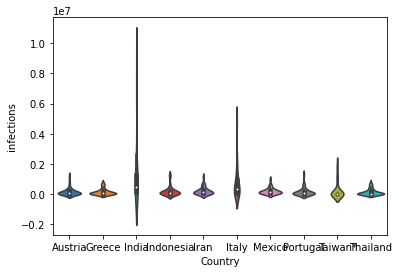

In [10]:
sns.violinplot(data=df2, x="Country", y="infections")

<AxesSubplot:xlabel='Year', ylabel='infections'>

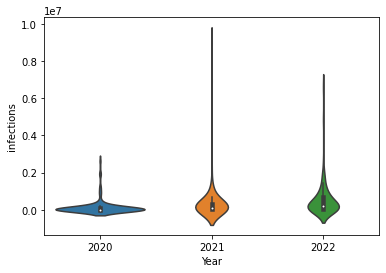

In [11]:
sns.violinplot(data=df2, x="Year", y="infections")

In [32]:
df3 = pd.merge(df2, ciadf, left_on="Country", right_on="country")
df3 = df3.dropna().reset_index(drop=True)
df3.head()

In [13]:
df3.columns

Index(['Country', 'Month', 'Year', 'infections', 'country',
       'current_health_expenditure_2019',
       'physicians_density_per_1000_2020_to_2018',
       'Hospital_bed_density_per_1000_2018_to_2017',
       'geography_area_total_sq_km',
       'real_GDP_per _capita_3year_average_2020_2018',
       'GDP_official_exchange_rate_Billion', 'Population',
       'Real_GDP_purchasing_power_parity_3year_ave'],
      dtype='object')

In [14]:
df3.drop(["Country", "country"], axis=1, inplace=True)
df3["Rate"] = (df3.infections/df3.Population) *100000
df3.head()


,Month,Year,infections,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave,Rate
0,1,2020,0.0,0.104,5.29,7.3,83871.0,54333.0,445.0,8913088.0,483.0,0.000000
1,1,2021,53223.0,0.104,5.29,7.3,83871.0,54333.0,445.0,8913088.0,483.0,597.133115
2,1,2022,564791.0,0.104,5.29,7.3,83871.0,54333.0,445.0,8913088.0,483.0,6336.647860
3,2,2020,3.0,0.104,5.29,7.3,83871.0,54333.0,445.0,8913088.0,483.0,0.033658
4,2,2021,43360.0,0.104,5.29,7.3,83871.0,54333.0,445.0,8913088.0,483.0,486.475619


In [15]:
def checkShapeOfData(df, col):
    # make histogram plot
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"HistPlot of {col}")
    plt.show()
    print()
    
    # boxplots
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    print()
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = df[col].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # normaltest
    print()
    print("Normal test:")
    num = int(len(df)*0.1)
#     print(st.normaltest(df[col].sample(num)))

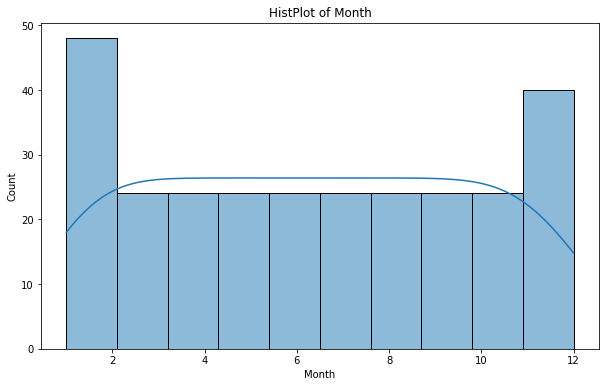

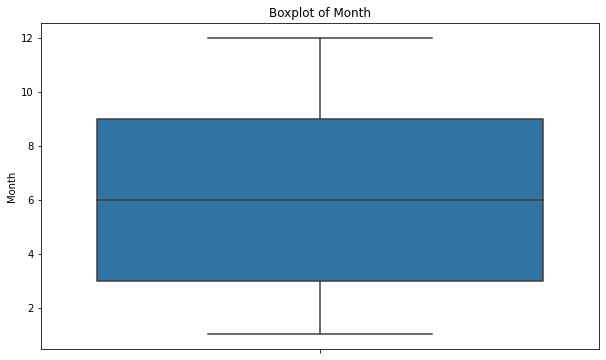


Values below -6.0 could be outliers.
Values above 18.0 could be outliers.

Normal test:


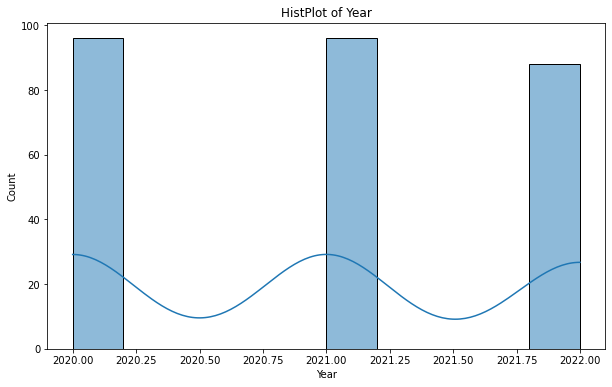

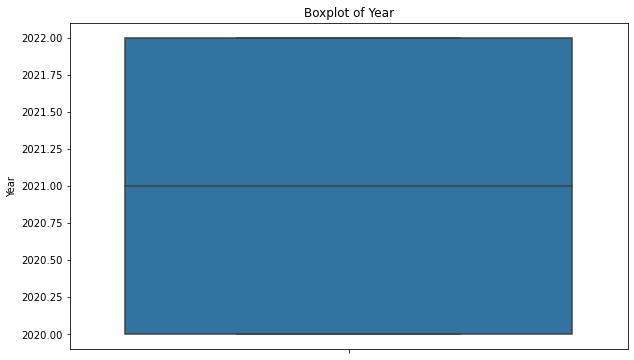


Values below 2017.0 could be outliers.
Values above 2025.0 could be outliers.

Normal test:


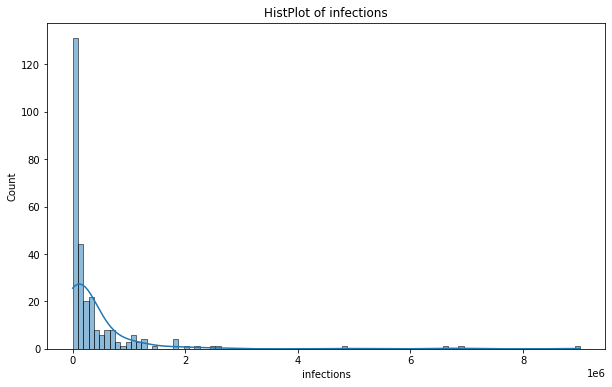

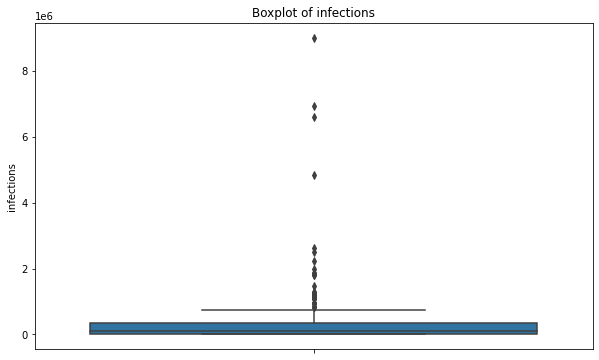


Values below -433609.125 could be outliers.
Values above 797343.875 could be outliers.

Normal test:


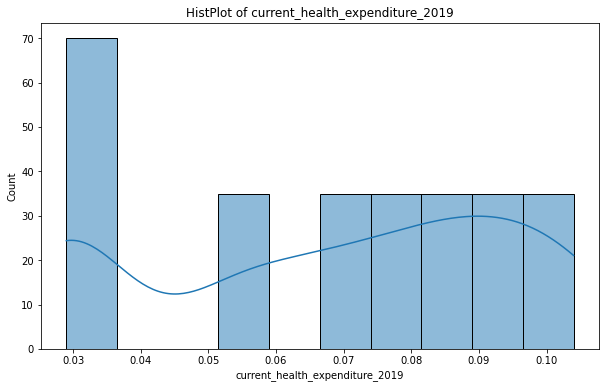

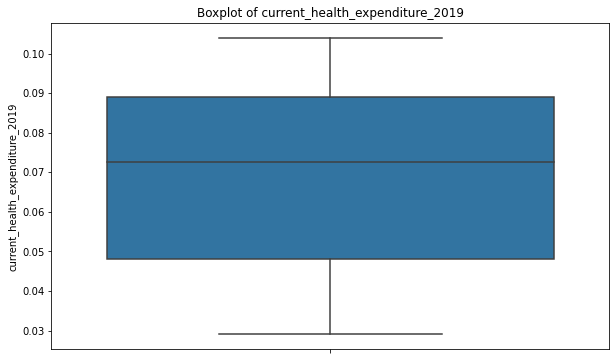


Values below -0.013499999999999991 could be outliers.
Values above 0.1505 could be outliers.

Normal test:


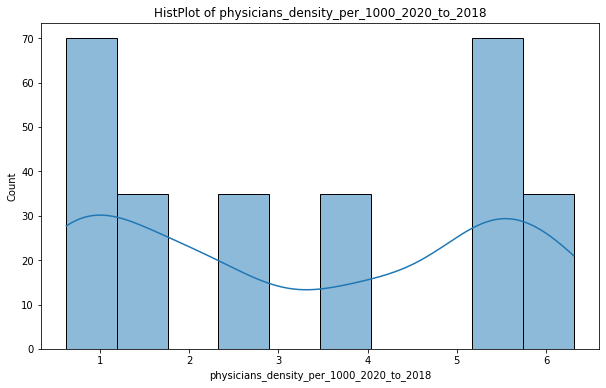

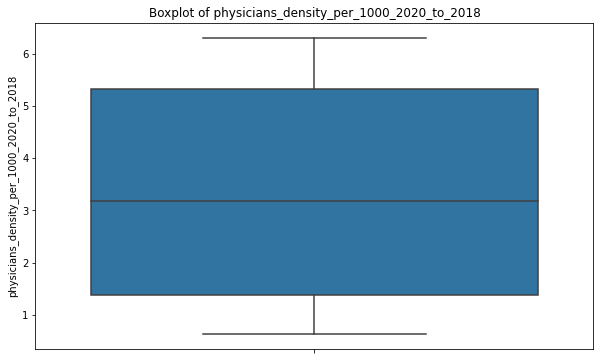


Values below -4.58125 could be outliers.
Values above 11.28875 could be outliers.

Normal test:


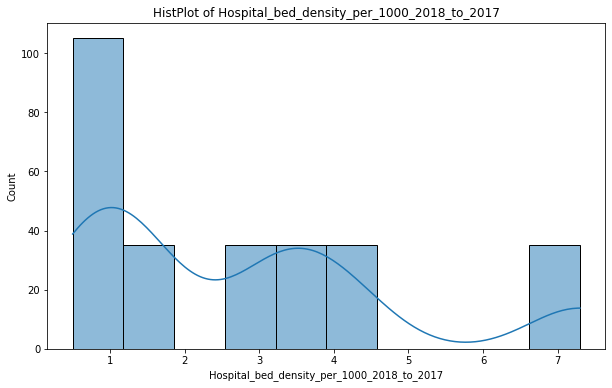

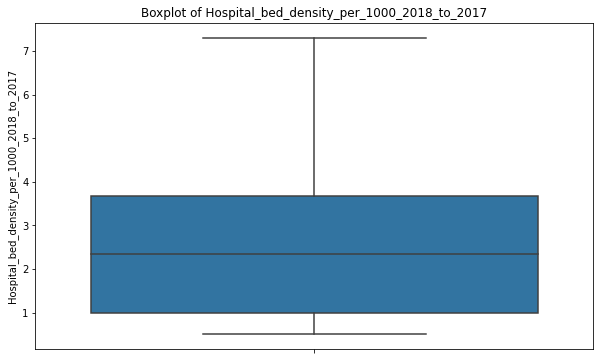


Values below -3.0124999999999993 could be outliers.
Values above 7.687499999999999 could be outliers.

Normal test:


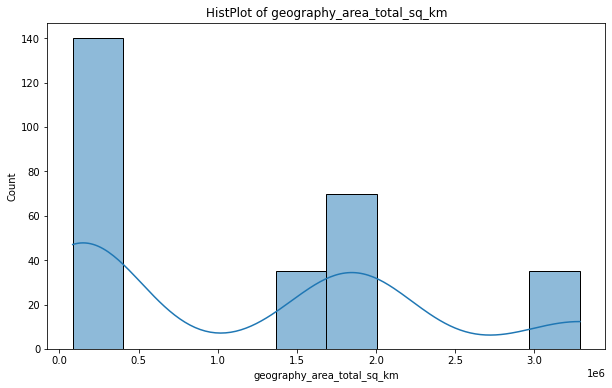

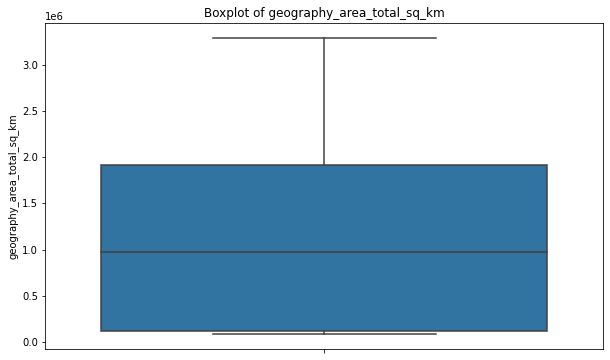


Values below -2574305.125 could be outliers.
Values above 4615815.875 could be outliers.

Normal test:


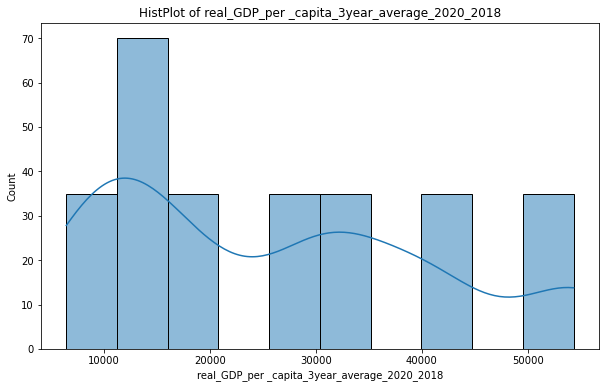

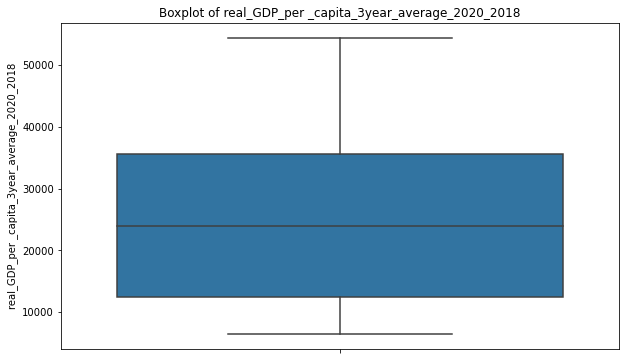


Values below -22241.375 could be outliers.
Values above 70291.625 could be outliers.

Normal test:


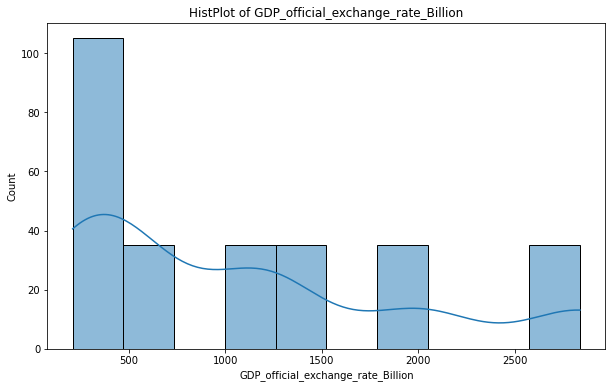

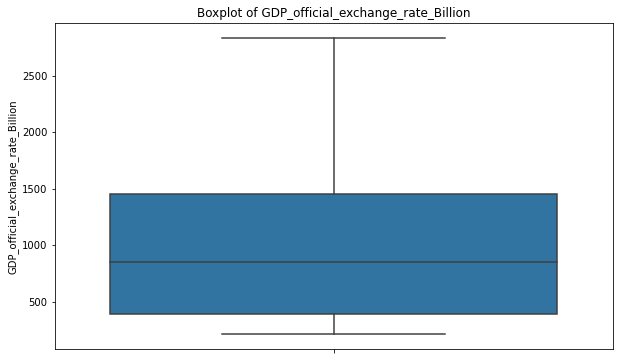


Values below -1196.75 could be outliers.
Values above 3043.25 could be outliers.

Normal test:


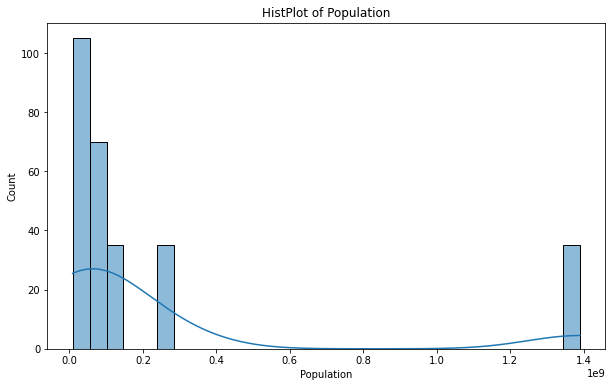

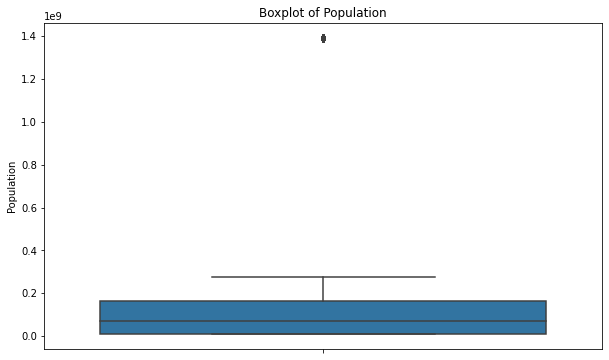


Values below -223140969.75 could be outliers.
Values above 399797412.25 could be outliers.

Normal test:


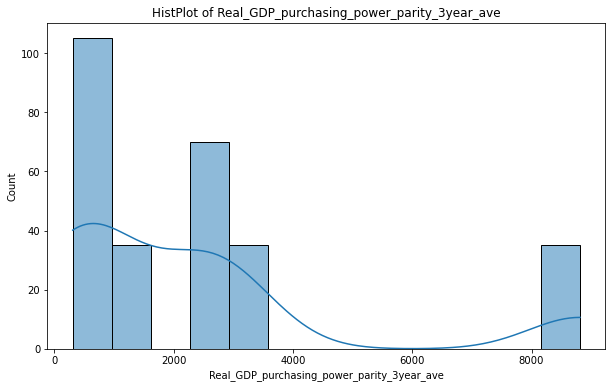

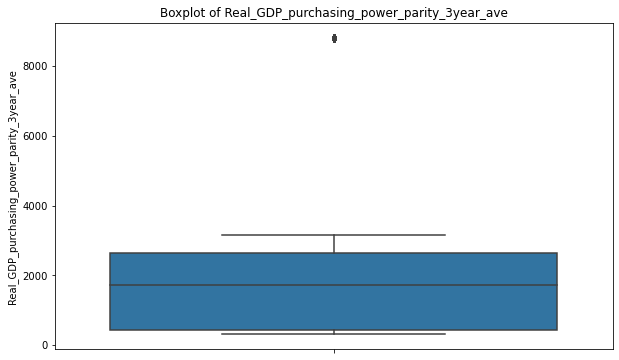


Values below -2846.875 could be outliers.
Values above 5942.125 could be outliers.

Normal test:


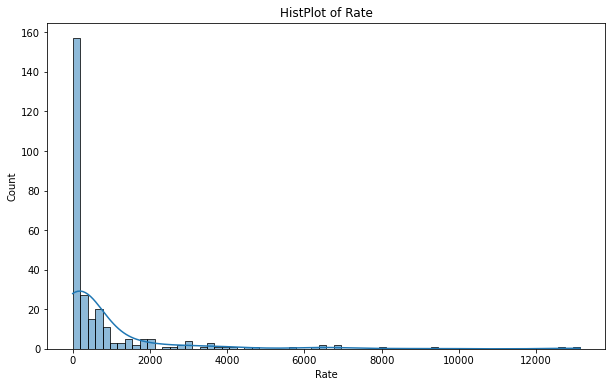

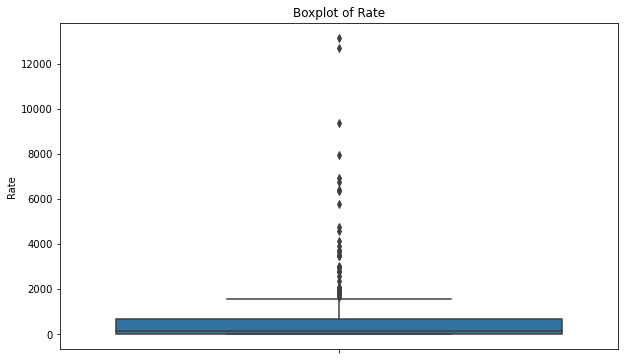


Values below -919.111105707472 could be outliers.
Values above 1637.6788889620404 could be outliers.

Normal test:


In [16]:
cols = df3.describe().columns
for col in cols:
    checkShapeOfData(df3, col)

In [17]:
df3.corr().Rate

Month                                          -0.157837
Year                                            0.379353
infections                                      0.233434
current_health_expenditure_2019                 0.355438
physicians_density_per_1000_2020_to_2018        0.368993
Hospital_bed_density_per_1000_2018_to_2017      0.356662
geography_area_total_sq_km                     -0.355716
real_GDP_per _capita_3year_average_2020_2018    0.349482
GDP_official_exchange_rate_Billion             -0.214055
Population                                     -0.207720
Real_GDP_purchasing_power_parity_3year_ave     -0.244650
Rate                                            1.000000
Name: Rate, dtype: float64

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Month                                         280 non-null    int64  
 1   Year                                          280 non-null    int64  
 2   infections                                    280 non-null    float64
 3   current_health_expenditure_2019               280 non-null    float64
 4   physicians_density_per_1000_2020_to_2018      280 non-null    float64
 5   Hospital_bed_density_per_1000_2018_to_2017    280 non-null    float64
 6   geography_area_total_sq_km                    280 non-null    float64
 7   real_GDP_per _capita_3year_average_2020_2018  280 non-null    float64
 8   GDP_official_exchange_rate_Billion            280 non-null    float64
 9   Population                                    280 non-null    flo

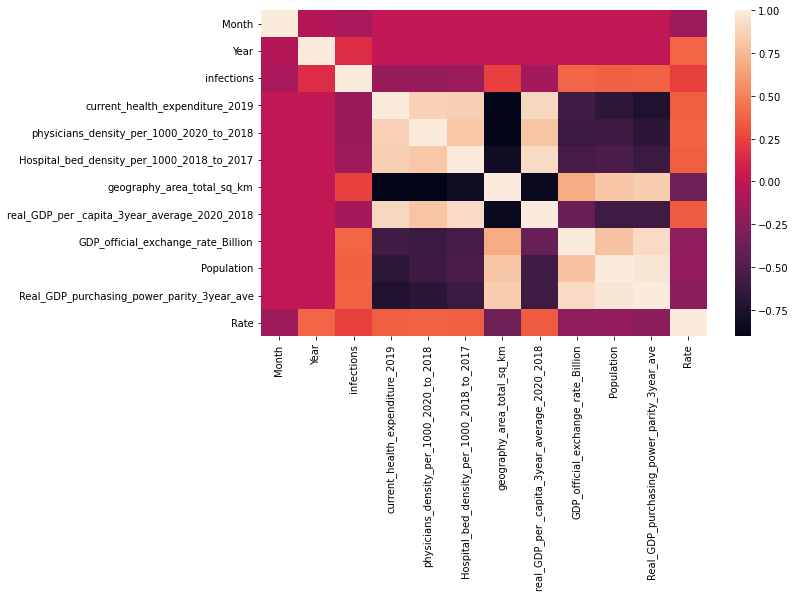

In [19]:
corrs = df3.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

In [20]:
feature = df3.drop(["infections", "Rate"], axis=1)
target = df3["Rate"]

In [21]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     13.77
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           3.45e-18
Time:                        10:04:53   Log-Likelihood:                -2433.2
No. Observations:                 280   AIC:                             4886.
Df Residuals:                     270   BIC:                             4923.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -1.601e+06   2.18e+05     -7.351      0.000   -2.03e+06   -1.17e+06
Month                                          -69.9839     25.999     -2.692      0.008    -121.170     -18.798
Year                                           796.0048    108.203      7.357      0.000     582.975    1009.034
current_health_expenditure_2019              -1.034e+05   1.41e+04     -7.351      0.000   -1.31e+05   -7.57e+04
physicians_density_per_1000_2020_to_2018       -16.8646    129.183     -0.131      0.896    -271.198     237.469
Hospital_bed_density_per_1000_2018_to_2017   -1042.7428    258.254     -4.038      0.000   -1551.190    -534.296
geography_area_total_sq_km                      -0.0003      0.000     -0.702      0.483      -0.001       0.000
real_GDP_per _capita_3year_average_2020_2018     0.2495      0.046      5.416      0.000       0.159       0.340
GDP_official_exchange_rate_Billion               2.8377      0.717      3.958      0.000       1.426       4.249
Population                                    1.951e-05   3.07e-06      6.344      0.000    1.35e-05    2.56e-05
Real_GDP_purchasing_power_parity_3year_ave      -4.4944      0.744     -6.038      0.000      -5.960      -3.029
==============================================================================
Omnibus:                      239.862   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4574.366
Skew:                           3.425   Prob(JB):                         0.00
Kurtosis:                      21.578   Cond. No.                     1.46e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)
print(reg.score(np.array(feature), np.array(target)))

[-6.99839053e+01  7.96004766e+02  5.79550389e-01  5.36780399e+01
 -6.51781898e+01 -4.18695599e-04  2.53337988e-02 -2.14468226e-01
  1.37242574e-06 -8.24542768e-02]
-1607533.282581236
0.3145562126272279


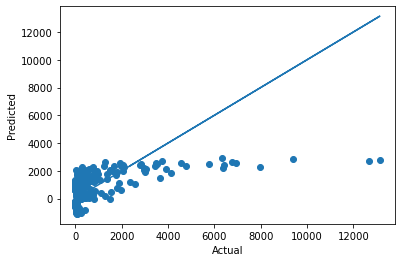

In [23]:
plt.scatter(target, reg.predict(np.array(feature)))
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
#cut for 2021

In [24]:
rf = RandomForestRegressor()
rf.fit(np.array(feature), np.array(target))
print(rf.score(np.array(feature), np.array(target)))

0.9477794713682819


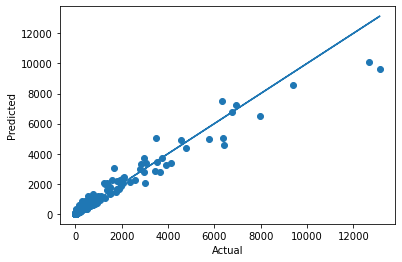

In [25]:
plt.scatter(target, rf.predict(np.array(feature)))
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [26]:
data = feature.iloc[150]
data

Month                                           4.000000e+00
Year                                            2.021000e+03
current_health_expenditure_2019                 6.700000e-02
physicians_density_per_1000_2020_to_2018        1.580000e+00
Hospital_bed_density_per_1000_2018_to_2017      1.600000e+00
geography_area_total_sq_km                      1.648195e+06
real_GDP_per _capita_3year_average_2020_2018    1.276700e+04
GDP_official_exchange_rate_Billion              5.810000e+02
Population                                      8.675830e+07
Real_GDP_purchasing_power_parity_3year_ave      1.033000e+03
Name: 150, dtype: float64

In [27]:
data["Population"]=300000
data["Hospital_bed_density_per_1000_2018_to_2017"]=5

rf.predict([data])

C:\Users\lyss\AppData\Local\Temp\ipykernel_4044\3074628842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Population"]=300000
C:\Users\lyss\AppData\Local\Temp\ipykernel_4044\3074628842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hospital_bed_density_per_1000_2018_to_2017"]=5


array([647.64536028])

In [28]:
rf.feature_importances_

array([0.37760729, 0.23605424, 0.0347033 , 0.04646631, 0.05099968,
       0.07786998, 0.04251463, 0.02497205, 0.09820102, 0.01061149])

In [29]:
data["Month"]=10
data["Hospital_bed_density_per_1000_2018_to_2017"]=5

rf.predict([data])

C:\Users\lyss\AppData\Local\Temp\ipykernel_4044\3365803515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=10
C:\Users\lyss\AppData\Local\Temp\ipykernel_4044\3365803515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hospital_bed_density_per_1000_2018_to_2017"]=5


array([576.74523668])